## **Individual Project - PIL17003689**

---

The Cross Industry Standard Process for Data-Mining (CRISP-DM) will be used for the creation of the artificial intelligence model. This methodology covers multiple phases regarding data cleaning and deployment whilst applying contxt to the processes of such phases.

---

$$Data-Understanding.$$

- **Libraries**

A multitude of libraries are used to perform phases of the CRISP-DM methodology: 
- Pandas :- used for data anlysis and understanding.
- NumPy :- supports mathematical calculations and array formatting.
- Matplotlib :- visualizes data with graphs and charts.

In [1]:
import pandas as pd 
import numpy as np 
import pickle 
import string 
from scipy import stats 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
# Will show as an 'import error' but still works

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

import torch
import torch.nn as nn
import torch.optim as optim

nltk.download('punkt')
nltk.download('stopwords')
# Imports all necessary libraries

data = pd.read_csv("weatherHistory.csv")
# Assigns the dataset to the variable data

C:\Users\pil17003689.CENTRAL\AppData\Local\Temp\ipykernel_11044\66557353.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pil17003689.CENTRAL\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pil17003689.CENTRAL\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!


$$-$$

- **Dataset Analysis**

After importing libraries, the dataset can be analysed.

In [2]:
data.head()
# Displays the first give rows of the dataset.

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


The .head() function can give examples of the dataset without looking into the csv file itself. From here, information can be found like what the data is and how it is stored. I.e., Summary being a String and Temperature being a Decimal.

In [3]:
data.info()
# Shows the variable state of the columns within the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


These assumptions can be solidified using the .info() function which shows whether data in a column is formatted as an object or float.

In [4]:
data.describe()
# Reveals numerical values such as the mean along with the upper and lower percentiles.

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
data.describe(include="object") 
# Adjusted describe function to show String values. 

,Formatted Date,Summary,Precip Type,Daily Summary
count,96453,96453,95936,96453
unique,96429,27,2,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31733,85224,20085


Additional data analysis using the .describe() function shows patterns within the data, for example, mostly cloudy days being the most popular with 20085 entries.

---

$$Data-Preparation.$$

- **Filling Null Data**

It should be assumed that the dataset contains errors, so it should be cleaned to ensure it is suitable to be used.

In [6]:
print("Unformatted Data: ")
print(data.isnull().sum())
# Displays the amount of null values within the unformatted data 

data.dropna(subset=["Formatted Date"], inplace=True)
data.fillna(0, inplace=True)
# Drops alls null data under "Formatted Date" with a 0 and fills the rest 

print("\n")
print("Formatted Data: ")
print(data.isnull().sum())
# Displays the amount of null values within the formatted data 

Unformatted Data: 
Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


Formatted Data: 
Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [7]:
print("Number of rows in unfiltered dataset:", len(data)) 
# Displays the amount of unfiltered rows there are without data cleaning.

Number of rows in unfiltered dataset: 96453


Data can be missing within a dataset. This can be due to an error in the form submission, or user error. Regardless, these data needs to be cleaned to fully optimise the dataset.
The .isnull() function can determine what data is null within a dataset and, from there, the data can either be filled or removed depending on its importance.

$$-$$

- **Finding Repetitions**

A key error in the dataset is the lack of unique identifiers. Without these, entries cannot be defined uniquely, thus creating the possibility for duplicate entries. At first glance, the dataset lacks an ID column thus one should be created. However, the "Formatted Date" column acts as a unique ID instead. Though, to ensure this can be assumed, a practice can still be executed to compare the "Formal Date" column to a newly constructed ID column, testing whether it acts as a unique identifier.

In [8]:
unique_data = {}
next_id = 1
# Creates an array to store the dataset into along with its ID, as well as an ID number ready to be incremented. 

for index, row in data.iterrows():
    data_tuple = tuple(row)
    # Iterates throughout the array. 
    
    if data_tuple in unique_data:
        data.at[index, 'ID'] = unique_data[data_tuple]
        # If the ID is the same as a previous, it will be assigned the same. 

    else:
        data.at[index, 'ID'] = next_id
        unique_data[data_tuple] = next_id
        next_id += 1
        # If not, then the ID is incremented normally. 

In [9]:
print("A sum of the duplicated Formatted Dates:")
print(data["Formatted Date"].duplicated().sum())
print("\n")
print("A sum of the duplicated IDs:")
print(data["ID"].duplicated().sum())
# Outputs the number of duplicate data from both columns for comparison. 

A sum of the duplicated Formatted Dates:
24


A sum of the duplicated IDs:
24


From this outcome, it can be deduced that the "Formatted Dates" column can be used as a unique identifier. However, it can also be concluded that there are multiple duplicate entries within the data, and these entries need to be dropped as to avoid any margin of error.

In [10]:
data.drop_duplicates(subset='ID', keep='first', inplace=True)
# Drops all duplicate entries in the "ID" column aside from the first instance of it. 
data.reset_index(drop=True, inplace=True)

data["ID"].duplicated().sum()

0

After dropping the duplicate data and ensuring the first instance of it is kept, there remains no sum of duplicates.

$$-$$

- **Data Visualization**

A way in which the effectiveness of data cleaning can be visualised is using a boxplot. This diagram can highlight any outliers within the dataset that may skew results, thus be removed.

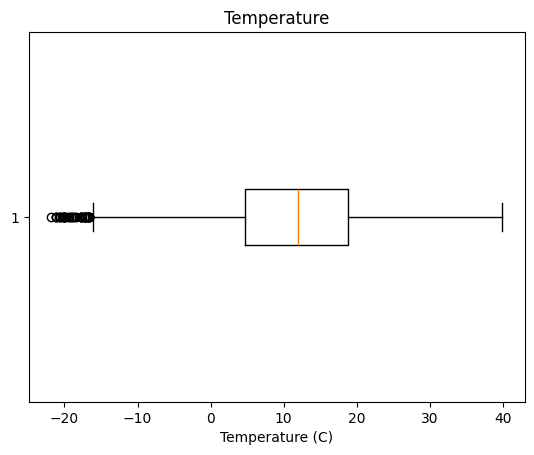

In [11]:
plt.boxplot(data["Temperature (C)"], vert=False)
# Creating a box plot
plt.xlabel("Temperature (C)")
plt.title("Temperature")
# Assigning excess details
plt.show()
# Makes a box plot to refer to the data. The Circles to the far left are called "Whiskers" and they are outliers that need removing.

In this boxplot, outliers have been found as -20°C within the "Temperature (C)" column. To rid of these, the interquartile range is used to find the upper and lower 25% of the data and identify any outliers that find fit the pattern.

In [12]:
dataQuantile = ["Temperature (C)", "Apparent Temperature (C)", "Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)", "Pressure (millibars)"] 
# Selects the data that will be used

for idata in dataQuantile:
    Q1 = data[idata].quantile(0.30)
    Q3 = data[idata].quantile(0.60)
    # Calculate the lower and upper quantile ranges
    
    IQR = Q3 - Q1
    # Calculates the Interquantile range

    cutoff = 1.5 * IQR 
    lower, upper = Q1 - cutoff, Q3 + cutoff
    # Removes all potential outliers within the top and bottom 10% of the previously selected data

    data = data[(data[idata] >= lower) & (data[idata] <= upper)] 
    # Applies the newly acquired data to the data variable

In [13]:
print("Number of rows in filtered dataset:", len(data))
# Displays the amount of filtered rows there are without data cleaning.

Number of rows in filtered dataset: 38025


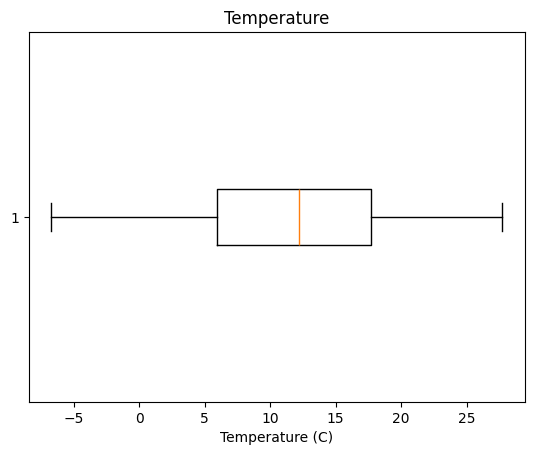

In [14]:
plt.boxplot(data["Temperature (C)"], vert=False)
# Creating a box plot
plt.xlabel("Temperature (C)")
plt.title("Temperature")
# Assigning excess details
plt.show()
# After removing the outliers, the box plot is displayed accordingly after data cleaning.

$$-$$

Now that all outliers have been removed, the data can be visualised in other ways, such as bar and line graphs that represent patterns in the data.

In [15]:
# Print the data of the 45th bottom entry
bottom_45th_entry = data.iloc[-45]
print("Data of the 45th bottom entry:")
print(bottom_45th_entry)

Data of the 45th bottom entry:
Formatted Date                                  2016-09-30 23:00:00.000 +0200
Summary                                                         Mostly Cloudy
Precip Type                                                              rain
Temperature (C)                                                     13.644444
Apparent Temperature (C)                                            13.644444
Humidity                                                                 0.83
Wind Speed (km/h)                                                      5.3291
Wind Bearing (degrees)                                                  165.0
Visibility (km)                                                       14.8764
Loud Cover                                                                0.0
Pressure (millibars)                                                  1017.97
Daily Summary               Partly cloudy starting in the morning continui...
ID                               

$$-$$

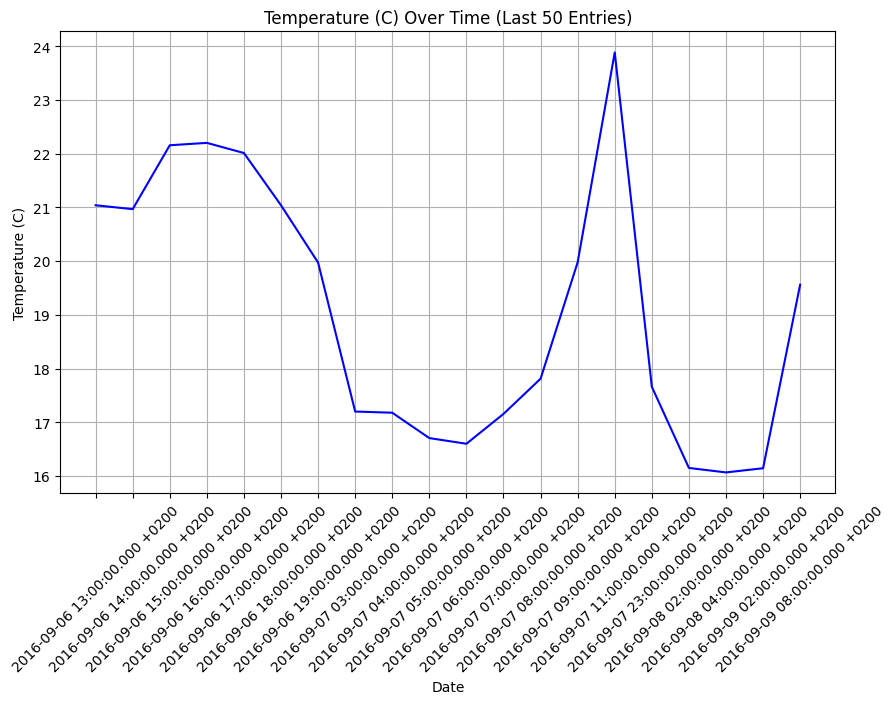

In [16]:
data_datetime = data.copy()

# Set 'Formatted Date' column as the index
data_datetime.set_index('Formatted Date', inplace=True)

# Select the last 50 entries for the training set
training_set = data_datetime.tail(20)

# Plot Temperature (C) over time for the training set
plt.figure(figsize=(10, 6))
plt.plot(training_set.index, training_set['Temperature (C)'], color='blue')
plt.title('Temperature (C) Over Time (Last 50 Entries)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Temperature (C)')
plt.grid(True)
plt.show()

In [17]:
#data_datetime['Formatted Date'] = pd.to_datetime(data_datetime['Formatted Date'], errors='coerce', utc=True)

# Check for any rows where 'Formatted Date' could not be parsed
#missing_dates = data_datetime[data_datetime['Formatted Date'].isnull()]

#print("Rows with missing or invalid dates:")
#print(missing_dates)

$$-$$

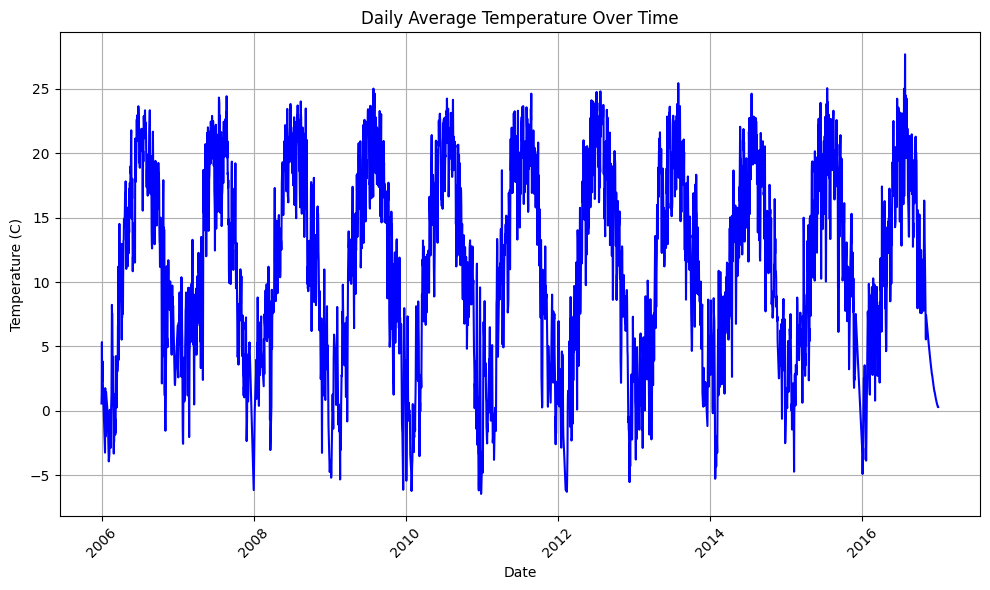

In [18]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

# Extract date from 'Formatted Date' column
data['Date'] = data['Formatted Date'].dt.date

# Calculate daily average temperature
daily_avg_temp = data.groupby('Date')['Temperature (C)'].mean()

# Plot daily average temperature over time
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_temp.index, daily_avg_temp.values, color='blue')
plt.title('Daily Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

$$-

- **Stop Word Removal**

After performing standard data cleaning on the dataset along with the incorporation of data visualisation to ensure the data is suitable, the dataset must undergo specialised data cleaning in regards to machine learning.

Stop Words are often referred to as filler text in the human language that is unnecessary for a machine learning algorithm to process. These include, but are not limited to; "-ion", -"ities" and "-s". This suffixes only change the definition of a word to a human being and are irrelevant to a program, thus are deemed not necessary and are removed.

In [19]:
# Saves the 'Daily Summary' column of the dataset into a list of strings
text_data = data['Daily Summary'].astype(str)

# Establishes english stop words to be used 
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Creates a loop for every unique piece of text within the column 
processed_text_data = []
for text in text_data:
    tokens = word_tokenize(text)
    
    # Removes the stop words from the tokens 
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Uses stemming on the filtered tokens 
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    # Incorporates the stemmed words back to the list 
    processed_text_data.append(stemmed_tokens)  

# Outputs each changed word within the column 
for idx, text in enumerate(processed_text_data):
    print(f"Processed text data {idx + 1}: {text}")


Processed text data 1: ['partli', 'cloudi', 'throughout', 'day', '.']
Processed text data 2: ['partli', 'cloudi', 'throughout', 'day', '.']
Processed text data 3: ['partli', 'cloudi', 'throughout', 'day', '.']
Processed text data 4: ['partli', 'cloudi', 'throughout', 'day', '.']
Processed text data 5: ['partli', 'cloudi', 'throughout', 'day', '.']
Processed text data 6: ['partli', 'cloudi', 'throughout', 'day', '.']
Processed text data 7: ['partli', 'cloudi', 'throughout', 'day', '.']
Processed text data 8: ['partli', 'cloudi', 'throughout', 'day', '.']
Processed text data 9: ['partli', 'cloudi', 'throughout', 'day', '.']
Processed text data 10: ['partli', 'cloudi', 'throughout', 'day', '.']
Processed text data 11: ['partli', 'cloudi', 'throughout', 'day', '.']
Processed text data 12: ['partli', 'cloudi', 'throughout', 'day', '.']
Processed text data 13: ['partli', 'cloudi', 'throughout', 'day', '.']
Processed text data 14: ['partli', 'cloudi', 'throughout', 'day', '.']
Processed text 

$$-$$

- **Tokenization**

Tokenization refers to the individual assigning of keywords to terms within a dataset or program. The process of doing so makes the text easier for machine learning algorithms to understand human language. By doing so, the newly acquired tokens are converted into 'bite-sized pieces' and are analyzed by the algorithm at a much faster pace.

In [20]:
# Assigns the content of the 'Summary' and 'Daily Summary' columns into an array
text_columns = ['Summary', 'Daily Summary']

# Loops for each piece of content within the array 
for column in text_columns:

    # Appplies tokenization to the string values 
    data[column] = data[column].apply(lambda x: [token.lower() for token in word_tokenize(str(x)) if token not in string.punctuation])
    # Inlcudes stop word removal for the tokens
    stop_words = set(stopwords.words('english'))
    data[column] = data[column].apply(lambda x: [token for token in x if token not in stop_words])

# Displays the results
print(data.head())


             Formatted Date           Summary Precip Type  Temperature (C)  \
2 2006-04-01 00:00:00+00:00  [mostly, cloudy]        rain         9.377778   
5 2006-04-01 03:00:00+00:00  [partly, cloudy]        rain         9.222222   
6 2006-04-01 04:00:00+00:00  [partly, cloudy]        rain         7.733333   
7 2006-04-01 05:00:00+00:00  [partly, cloudy]        rain         8.772222   
8 2006-04-01 06:00:00+00:00  [partly, cloudy]        rain        10.822222   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
2                  9.377778      0.89             3.9284   
5                  7.111111      0.85            13.9587   
6                  5.522222      0.95            12.3648   
7                  6.527778      0.89            14.1519   
8                 10.822222      0.82            11.3183   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
2                   204.0          14.9569         0.0               1015.94   
5         

$$-$$

- **Vectorization**

Like Tokenization, Vectorization is a process in which text is converted into numerical representations of itself with a goal to make it easier to be understood by a machine learning algorithm. Unlike Tokenization, however, Vectorization consists of applying context to the newly structurized data that is more meaningful. i.e., it differerenciates whether a piece of text is an email address or a sentence for the algorithm to apply context to.

In [21]:
# Assigns the content of the 'Summary' and 'Daily Summary' columns into an array
text_columns = ['Summary', 'Daily Summary']

# Converts the data within the array to a string if they aren't already 
data[text_columns] = data[text_columns].astype(str)
# Joins the array into one column
data['text'] = data[text_columns].apply(lambda x: ' '.join(x), axis=1)

tfidf_vectorizer = TfidfVectorizer()

# Applies Vectorization 
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

# Converts the processed data into a dataframe 
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Displays the results 
print(tfidf_df)

       afternoon  breezy     clear    cloudy  continuing       day  drizzle  \
0            0.0     0.0  0.000000  0.540152         0.0  0.441140      0.0   
1            0.0     0.0  0.000000  0.464976         0.0  0.379745      0.0   
2            0.0     0.0  0.000000  0.464976         0.0  0.379745      0.0   
3            0.0     0.0  0.000000  0.464976         0.0  0.379745      0.0   
4            0.0     0.0  0.000000  0.464976         0.0  0.379745      0.0   
...          ...     ...       ...       ...         ...       ...      ...   
38020        0.0     0.0  0.000000  0.464976         0.0  0.379745      0.0   
38021        0.0     0.0  0.000000  0.399798         0.0  0.000000      0.0   
38022        0.0     0.0  0.000000  0.399798         0.0  0.000000      0.0   
38023        0.0     0.0  0.644716  0.219608         0.0  0.000000      0.0   
38024        0.0     0.0  0.000000  0.426497         0.0  0.000000      0.0   

       evening  foggy  humid  ...   morning    most

---

$$Modelling.$$

- **Random Forest**

In [22]:
# Display column names to verify the correct column names
print(data.columns)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary', 'ID', 'Date', 'text'],
      dtype='object')


In [23]:

padata = pd.read_csv("weatherHistory.csv")

# Get unique daily summaries
unique_summaries = padata['Daily Summary'].unique()

# Create a dictionary to store the different values of other variables for each unique daily summary
different_variables = {}

# Iterate over unique daily summaries
for summary in unique_summaries:
    # Select rows with the current daily summary
    subset = padata[padata['Daily Summary'] == summary]
    # Find different values of other variables
    different_variables[summary] = subset.drop(columns=['Daily Summary']).nunique()

# Print out the different values of other variables for each unique daily summary
for summary, variables in different_variables.items():
    print("Daily Summary:", summary)
    print("Different values of other variables:")
    print(variables)
    print()


Daily Summary: Partly cloudy throughout the day.
Different values of other variables:
Formatted Date              9981
Summary                       14
Precip Type                    2
Temperature (C)             3634
Apparent Temperature (C)    4149
Humidity                      84
Wind Speed (km/h)           1487
Wind Bearing (degrees)       360
Visibility (km)              495
Loud Cover                     1
Pressure (millibars)        2444
dtype: int64

Daily Summary: Mostly cloudy throughout the day.
Different values of other variables:
Formatted Date              20085
Summary                        15
Precip Type                     2
Temperature (C)              4622
Apparent Temperature (C)     5460
Humidity                       79
Wind Speed (km/h)            1804
Wind Bearing (degrees)        360
Visibility (km)               714
Loud Cover                      1
Pressure (millibars)         3327
dtype: int64

Daily Summary: Foggy in the evening.
Different values of other 

$$-$$

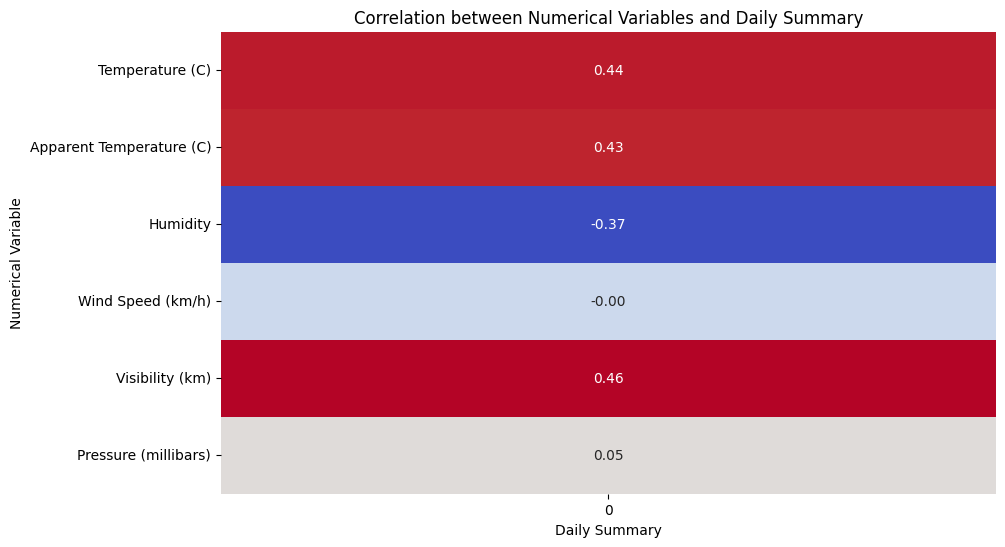

In [24]:

ccdata = pd.read_csv("weatherHistory.csv")

# Encode the 'Daily Summary' column
label_encoder = LabelEncoder()
ccdata['Daily Summary'] = label_encoder.fit_transform(ccdata['Daily Summary'])

# Calculate correlation coefficients between numerical variables and daily summary
numerical_variables = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
correlation_numerical = ccdata[numerical_variables].corrwith(ccdata['Daily Summary'])

# Visualize correlations using heatmap for numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_numerical.to_frame(), annot=True, cmap='coolwarm', cbar=False, fmt=".2f")
plt.title('Correlation between Numerical Variables and Daily Summary')
plt.xlabel('Daily Summary')
plt.ylabel('Numerical Variable')
plt.show()


In [25]:
# Picks highest correlation
selected_features = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Visibility (km)']
random_X = data[selected_features]
random_y = data['Daily Summary']


# Creates training sets
random_X_train, random_X_test, random_y_train, random_y_test = train_test_split(random_X, random_y, test_size=0.2, random_state=42)

# Trains the model
random_for = RandomForestClassifier(n_estimators=100, random_state=42)
random_for.fit(random_X_train, random_y_train)

# Creates predictions 
random_y_pred = random_for.predict(random_X_test)
print(classification_report(random_y_test, random_y_pred))

# Prints output
new_data = pd.DataFrame({'Temperature (C)': [15], 'Apparent Temperature (C)': [14], 'Humidity': [0.8], 'Visibility (km)': [10]})
prediction = random_for.predict(new_data)
print("Predicted Daily Summary:", prediction)

                                                                                                                                    precision    recall  f1-score   support

                                                                  ['breezy', 'afternoon', 'mostly', 'cloudy', 'throughout', 'day']       0.00      0.00      0.00         1
                                                                                                    ['breezy', 'foggy', 'morning']       0.00      0.00      0.00         1
                                                                    ['breezy', 'morning', 'mostly', 'cloudy', 'throughout', 'day']       0.00      0.00      0.00         3
                                           ['breezy', 'morning', 'partly', 'cloudy', 'starting', 'evening', 'continuing', 'night']       0.00      0.00      0.00         0
                                                                                       ['breezy', 'mostly', 'cloudy', 'overnight']       0.

C:\Users\pil17003689.CENTRAL\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pil17003689.CENTRAL\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pil17003689.CENTRAL\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

$$-$$

- **Linear Regression**

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
converted_data = pd.read_csv("weatherHistory.csv")

# Convert 'Formatted Date' to datetime
converted_data['Formatted Date'] = pd.to_datetime(converted_data['Formatted Date'])

# Extract features from 'Formatted Date'
converted_data['Unix Timestamp'] = converted_data['Formatted Date'].apply(lambda x: x.timestamp())  # Convert to Unix timestamp (seconds since epoch)
converted_data.drop(['Formatted Date', 'Summary', 'Daily Summary'], axis=1, inplace=True)

# Data Preprocessing
linear_data = pd.get_dummies(converted_data, columns=['Precip Type'])  # One-hot encoding for 'Precip Type'
linear_data.dropna(inplace=True)

# Splitting the data into features (X) and target variable (y)
linear_X = linear_data.drop('Temperature (C)', axis=1)
linear_y = linear_data['Temperature (C)']

# Splitting the data into training and testing sets
linear_X_train, linear_X_test, linear_y_train, linear_y_test = train_test_split(linear_X, linear_y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(linear_X_train, linear_y_train)

# Model Evaluation
train_preds = model.predict(linear_X_train)
test_preds = model.predict(linear_X_test)

train_mse = mean_squared_error(linear_y_train, train_preds)
test_mse = mean_squared_error(linear_y_test, test_preds)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")


Train MSE: 0.8997715234005719
Test MSE: 0.897346701329846


C:\Users\pil17003689.CENTRAL\AppData\Local\Temp\ipykernel_11044\2764129141.py:10: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  converted_data['Formatted Date'] = pd.to_datetime(converted_data['Formatted Date'])


$$-$$

- **Neural Network**

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Perform one-hot encoding on the "Daily Summary" column
one_hot_encoder = OneHotEncoder()
encoded_summary = one_hot_encoder.fit_transform(data[["Daily Summary"]])

# Select columns to keep for features (excluding "Daily Summary")
columns_to_keep = ["Apparent Temperature (C)", "Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)", "Loud Cover", "Pressure (millibars)"]
Neural_X = data[columns_to_keep]

# Create training and testing sets
Neural_X_train, Neural_X_test, Neural_y_train, Neural_y_test = train_test_split(Neural_X, encoded_summary, test_size=0.2, random_state=42)

# Standardize features (excluding dropped columns)
Neural_scaler = StandardScaler()
Neural_X_train_scaled = Neural_scaler.fit_transform(Neural_X_train)
Neural_X_test_scaled = Neural_scaler.transform(Neural_X_test)

num_classes = encoded_summary.shape[1]

# Convert the sparse matrix to a dense array
Neural_y_train_dense = Neural_y_train.toarray()
Neural_y_test_dense = Neural_y_test.toarray()

# Construct neural network using dense and dropout layers
Neural_model = Sequential([
    Dense(64, activation='relu', input_shape=(Neural_X_train_scaled.shape[1],)),
    Dropout(0.2),  
    Dense(32, activation='relu'),
    Dropout(0.2),  
    Dense(num_classes, activation='softmax')  # Adjust the output layer for multiclass classification
])

# Compile the model
Neural_model.compile(optimizer=Adam(), loss='categorical_crossentropy')

# Train the model
history = Neural_model.fit(Neural_X_train_scaled, Neural_y_train_dense, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
mse = Neural_model.evaluate(Neural_X_test_scaled, Neural_y_test_dense)
print("Mean Squared Error:", mse)


Epoch 1/50


C:\Users\pil17003689.CENTRAL\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - loss: 3.6183 - val_loss: 2.8813
Epoch 2/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - loss: 2.8831 - val_loss: 2.8330
Epoch 3/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - loss: 2.8436 - val_loss: 2.8040
Epoch 4/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - loss: 2.7997 - val_loss: 2.7862
Epoch 5/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - loss: 2.7911 - val_loss: 2.7776
Epoch 6/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - loss: 2.7813 - val_loss: 2.7652
Epoch 7/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - loss: 2.7493 - val_loss: 2.7568
Epoch 8/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - loss: 2.7389 - val_loss: 2.7497
Epoch 9/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - loss: 2.7484 - val_loss: 2.7416
Epoch 10/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - loss: 2.7167 - val_loss: 2.7375
Epoch 11/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - loss: 2.7139 - val_loss: 2.7320
Epoch 12/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 

In [28]:
# Sample size
sample_size = len(data)
print("Sample size:", sample_size)


Sample size: 38025


In [29]:
print("Training Data Shape:", Neural_X_train.shape)
print("Testing Data Shape:", Neural_X_test.shape)
print("Training Labels Shape:", Neural_y_train.shape)
print("Testing Labels Shape:", Neural_y_test.shape)


Training Data Shape: (30420, 7)
Testing Data Shape: (7605, 7)
Training Labels Shape: (30420, 186)
Testing Labels Shape: (7605, 186)


$$-$$

In [31]:
# Denotes columns for scaler to keep
columns_to_keep = ["Apparent Temperature (C)", "Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)", "Loud Cover", "Pressure (millibars)"]
Neural_X = data[columns_to_keep]

# Creates Scaler
Neural_scaler = StandardScaler()
Neural_X_train_scaled = Neural_scaler.fit_transform(Neural_X_train)
Neural_X_test_scaled = Neural_scaler.transform(Neural_X_test)

# Saves the Scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(Neural_scaler, f)

# Saves the Neural Network
with open('neural_network_model.pkl', 'wb') as f:
    pickle.dump(Neural_model, f)

print("Neural network model and scaler saved successfully!")


Neural network model and scaler saved successfully!


In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import numpy as np
import pickle


# Select columns for input features (X) and target labels (y)
selected_features = ["Temperature (C)", "Humidity", "Wind Speed (km/h)"]
target_column = "Daily Summary"

# Extract selected features and target labels
X = data[selected_features]
y = data[target_column]

# Encode target labels using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the number of classes (unique daily summaries)
# Define the number of classes (unique daily summaries)
num_classes = len(label_encoder.classes_)

# Construct neural network using dense and dropout layers
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),
    Dropout(0.2),  
    Dense(32, activation='relu'),
    Dropout(0.2),  
    Dense(num_classes, activation='softmax')  # Adjust the output layer for multiclass classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Save the model and scaler using pickle
# Save the model
with open("neural_network_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


Epoch 1/50


C:\Users\pil17003689.CENTRAL\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


761/761 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step - accuracy: 0.2361 - loss: 3.6441 - val_accuracy: 0.2766 - val_loss: 2.9306
Epoch 2/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - accuracy: 0.2832 - loss: 2.9403 - val_accuracy: 0.2763 - val_loss: 2.9035
Epoch 3/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - accuracy: 0.2883 - loss: 2.8887 - val_accuracy: 0.2770 - val_loss: 2.9004
Epoch 4/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - accuracy: 0.2852 - loss: 2.8786 - val_accuracy: 0.2738 - val_loss: 2.8889
Epoch 5/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - accuracy: 0.2860 - loss: 2.8587 - val_accuracy: 0.2763 - val_loss: 2.8881
Epoch 6/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - accuracy: 0.2806 - loss: 2.8666 - val_accuracy: 0.2760 - val_loss: 2.8780
Epoch 7/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - accuracy: 0.2852 - loss: 2.8583 - val_accuracy: 0.2756 - val_loss: 2.8778
Epoch 8/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - accuracy: 0.2849 - loss: 2.8435 - val_accurac